In [11]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

base_path = r"C:\Users\arfin\Downloads\covid xray\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset"
# Load each metadata file
df_covid = pd.read_excel(os.path.join(base_path, "COVID.metadata.xlsx"))
df_normal = pd.read_excel(os.path.join(base_path, "Normal.metadata.xlsx"))
df_opacity = pd.read_excel(os.path.join(base_path, "Lung_Opacity.metadata.xlsx"))
df_pneumonia = pd.read_excel(os.path.join(base_path, "Viral Pneumonia.metadata.xlsx"))

# Add labels
df_covid["label"] = "COVID"
df_normal["label"] = "Normal"
df_opacity["label"] = "Lung_Opacity"
df_pneumonia["label"] = "Viral Pneumonia"

# Combine
df_all = pd.concat([df_covid, df_normal, df_opacity, df_pneumonia], ignore_index=True)
print(df_all.head(10))

shapes = []

for idx, row in df_all.iterrows():
    label = row['label']
    file = row['FILE NAME'] if 'FILE NAME' in row else row['filename']

    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    image_path = os.path.join(base_path, label, 'images', file)

    if os.path.exists(image_path):
        img_color = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img_color is not None:
            shapes.append(img_color.shape)
        else:
            shapes.append(None)
    else:
        shapes.append(None)

# Add shapes as a new column to your DataFrame
df_all['shape'] = shapes
print(df_all.head())

  FILE NAME FORMAT     SIZE  \
0   COVID-1    PNG  256*256   
1   COVID-2    PNG  256*256   
2   COVID-3    PNG  256*256   
3   COVID-4    PNG  256*256   
4   COVID-5    PNG  256*256   
5   COVID-6    PNG  256*256   
6   COVID-7    PNG  256*256   
7   COVID-8    PNG  256*256   
8   COVID-9    PNG  256*256   
9  COVID-10    PNG  256*256   

                                                 URL  label  
0  https://sirm.org/category/senza-categoria/covi...  COVID  
1  https://sirm.org/category/senza-categoria/covi...  COVID  
2  https://sirm.org/category/senza-categoria/covi...  COVID  
3  https://sirm.org/category/senza-categoria/covi...  COVID  
4  https://sirm.org/category/senza-categoria/covi...  COVID  
5  https://sirm.org/category/senza-categoria/covi...  COVID  
6  https://sirm.org/category/senza-categoria/covi...  COVID  
7  https://sirm.org/category/senza-categoria/covi...  COVID  
8  https://sirm.org/category/senza-categoria/covi...  COVID  
9  https://sirm.org/category/senza-cat

KeyboardInterrupt: 

In [8]:
print(df_all.head())


  FILE NAME FORMAT     SIZE  \
0   COVID-1    PNG  256*256   
1   COVID-2    PNG  256*256   
2   COVID-3    PNG  256*256   
3   COVID-4    PNG  256*256   
4   COVID-5    PNG  256*256   

                                                 URL  label       shape  
0  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
1  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
2  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
3  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
4  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  


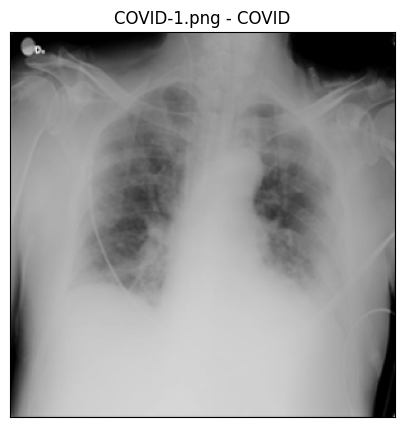

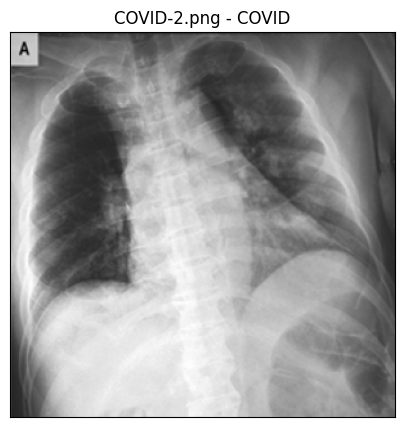

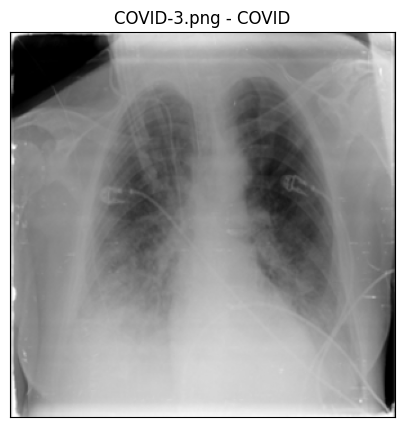

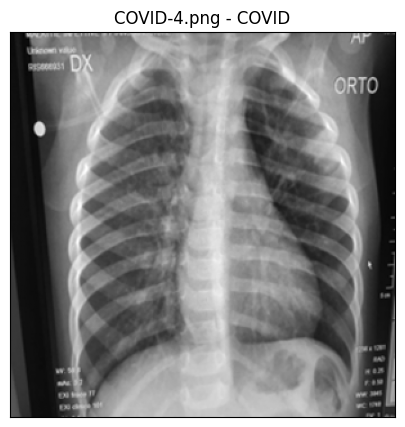

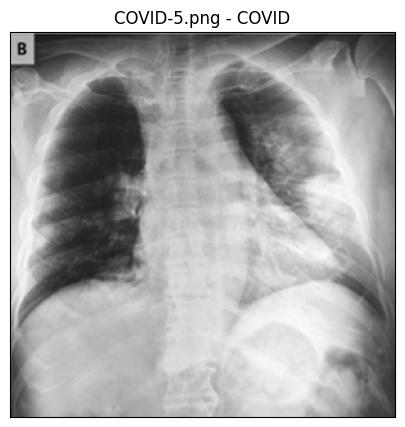

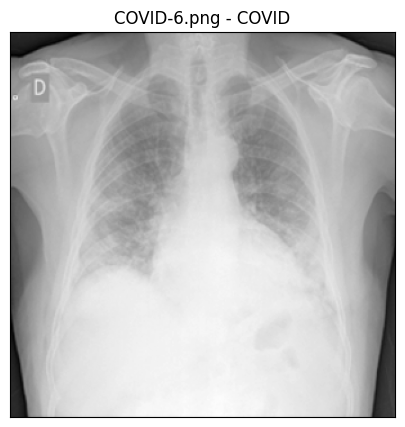

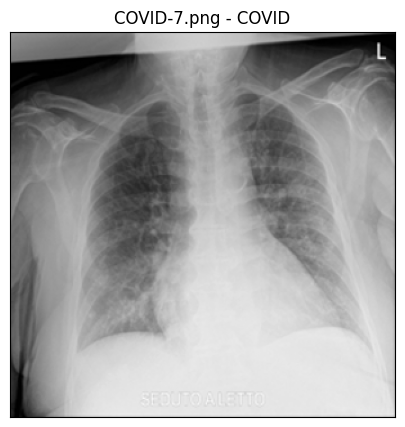

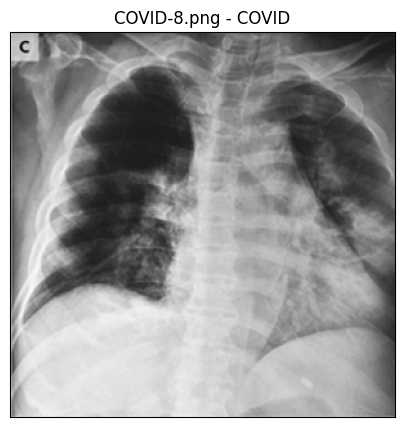

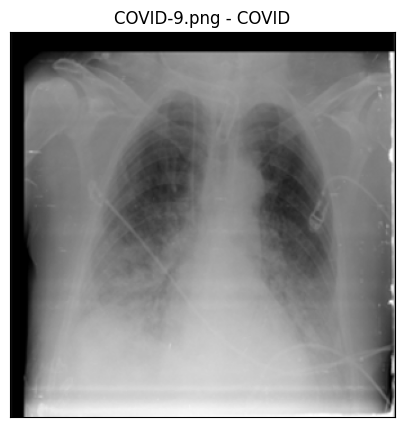

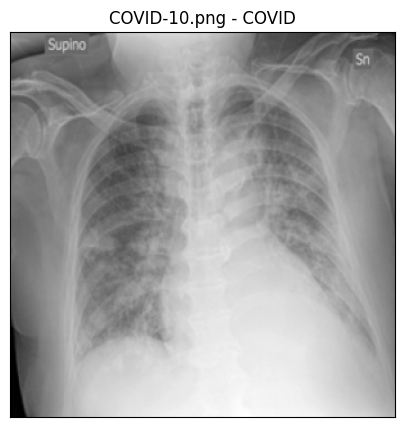

In [12]:
import matplotlib.pyplot as plt
for idx, row in df_all.head(10).iterrows():
    label = row['label']
    file = row['FILE NAME']

    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    image_path = os.path.join(base_path, label, 'images', file)

    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img_gray is not None:
        plt.figure(figsize=(8, 5))
        plt.imshow(img_gray, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f"{file} - {label}")
        plt.show()



In [ ]:
'some images are in RGB standardising them'
import os
import cv2
import pandas as pd
import numpy as np

# Path setup
base_path = base_path = r"C:/Users/arfin/Downloads/covid xray/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"

# Load metadata from the Excel file
metadata_path = "C:/Users/arfin/Downloads/covid xray/image_metadata_summary.xlsx"
df = pd.read_excel(metadata_path)

# List to track conversion status
conversion_status = []

# Output folder (if you want to save standardized images)
output_folder = os.path.join(base_path, "converted_grayscale")
os.makedirs(output_folder, exist_ok=True)

# Process images
for idx, row in df.iterrows():
    label = row['label']
    file = row['filename'] if 'filename' in row else row['FILE NAME']

    # Ensure file extension
    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    image_path = os.path.join(base_path, label, 'images', file)

    if os.path.exists(image_path):
        # Read image in color (in case it's RGB)
        img_color = cv2.imread(image_path)

        if img_color is not None:
            # Convert to grayscale
            img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

            # Save standardized image (optional)
            save_path = os.path.join(output_folder, f"{label}_{file}")
            cv2.imwrite(save_path, img_gray)

            # Record status
            conversion_status.append((file, "converted", img_gray.shape))
        else:
            conversion_status.append((file, "failed to read", None))
    else:
        conversion_status.append((file, "file missing", None))

# Create a DataFrame of conversion results
df_conversion = pd.DataFrame(conversion_status, columns=['filename', 'status', 'shape'])

# Save conversion report
df_conversion.to_csv("C:/Users/arfin/Downloads/covid xray/image_conversion_report.csv", index=False)

print("✅ Image conversion complete. Report saved.")


✅ Image conversion complete. Report saved.


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
base_path = r"C:\Users\arfin\Downloads\covid xray\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset"
classes = ["COVID", "Viral Pneumonia", "Normal", "Lung_Opacity"]

# Output path to save processed images
output_path = r"C:\Users\arfin\Downloads\processed_xrays"
os.makedirs(output_path, exist_ok=True)

# Loop through each class folder
for label in classes:
    image_dir = os.path.join(base_path, label, "images")
    mask_dir = os.path.join(base_path, label, "masks")

    processed_dir = os.path.join(output_path, label)
    os.makedirs(processed_dir, exist_ok=True)

    # List all image files
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)

            # Load image and mask
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                print(f"Skipping {filename}: missing image or mask")
                continue

            # Resize mask to match image size
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))

            # Ensure binary mask (0, 255)
            _, mask_binary = cv2.threshold(mask_resized, 127, 255, cv2.THRESH_BINARY)

            # Apply Gaussian blur
            blurred = cv2.GaussianBlur(img, (5, 5), 0)

            # Apply CLAHE
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            contrast_img = clahe.apply(blurred)

            # Keep processed pixels inside lung mask, zero elsewhere
            processed_img = cv2.bitwise_and(contrast_img, contrast_img, mask=mask_binary)

            # Save processed image
            save_path = os.path.join(processed_dir, filename)
            cv2.imwrite(save_path, processed_img)

print("✅ All images processed and saved.")
#What this does:
#Loops through each class and its images/masks
#Reads the image and corresponding mask
#Resizes mask to 299×299 to match image
#Applies Gaussian blur
#Applies CLAHE for contrast enhancement
#Applies mask: keeps processed pixels inside lungs, zeroes background
#Saves processed images in processed_xrays\[class] folders


✅ All images processed and saved.


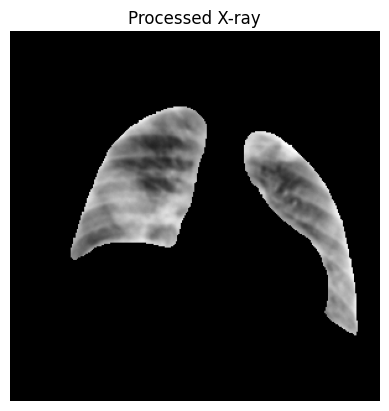

In [17]:
sample_img = cv2.imread(save_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_img, cmap='gray')
plt.title('Processed X-ray')
plt.axis('off')
plt.show()


In [18]:
import numpy as np
import cv2
import os

# Paths
base_path = r"C:\Users\arfin\Downloads\processed_xrays"
classes = ["COVID", "Viral Pneumonia", "Normal", "Lung_Opacity"]

images = []
labels = []

# Load images into list
for label in classes:
    image_dir = os.path.join(base_path, label)
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)

# Convert to NumPy arrays
images_np = np.array(images)
labels_np = np.array(labels)

# Save to .npz file
np.savez_compressed(r"C:\Users\arfin\Downloads\xray_dataset.npz", images=images_np, labels=labels_np)

print("✅ Images and labels saved to .npz file.")


✅ Images and labels saved to .npz file.


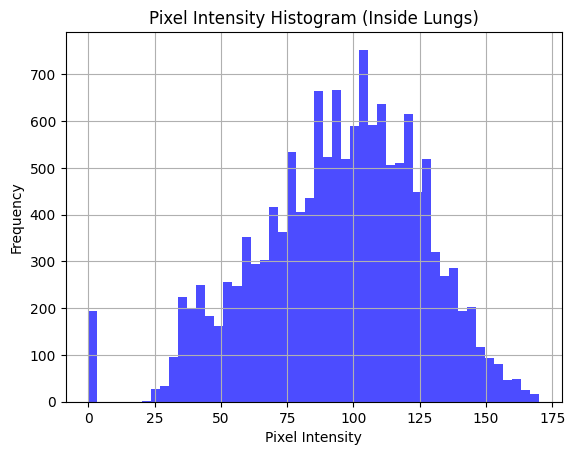

In [21]:
mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
pixels_in_mask = img[mask_resized == 255]

plt.hist(pixels_in_mask, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Histogram (Inside Lungs)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



In [22]:
mean_intensity = np.mean(pixels_in_mask)
std_intensity = np.std(pixels_in_mask)

print(f"Mean intensity inside lungs: {mean_intensity:.2f}")
print(f"Standard deviation of intensity inside lungs: {std_intensity:.2f}")


Mean intensity inside lungs: 94.25
Standard deviation of intensity inside lungs: 31.17


In [23]:
import numpy as np
import pandas as pd

# Load dataset
data = np.load(r"C:\Users\arfin\Downloads\xray_dataset.npz")
images_np = data['images']
labels_np = data['labels']

# Lists to store results
mean_intensities = []
std_intensities = []

# Loop through images
for img in images_np:
    pixels_in_mask = img[img > 0]  # non-zero pixels (inside mask)

    if len(pixels_in_mask) > 0:
        mean_intensity = np.mean(pixels_in_mask)
        std_intensity = np.std(pixels_in_mask)
    else:
        mean_intensity, std_intensity = 0, 0  # or np.nan if no mask

    mean_intensities.append(mean_intensity)
    std_intensities.append(std_intensity)

# Create a DataFrame with results
df_stats = pd.DataFrame({
    'label': labels_np,
    'mean_intensity': mean_intensities,
    'std_intensity': std_intensities
})

# Save stats to CSV if you like
df_stats.to_csv(r"C:\Users\arfin\Downloads\xray_masked_stats.csv", index=False)

# Show summary
print(df_stats.head())


   label  mean_intensity  std_intensity
0  COVID      126.391402      39.033796
1  COVID      117.685818      32.649107
2  COVID      110.924209      48.022406
3  COVID      118.527285      52.318689
4  COVID      114.270570      42.192162


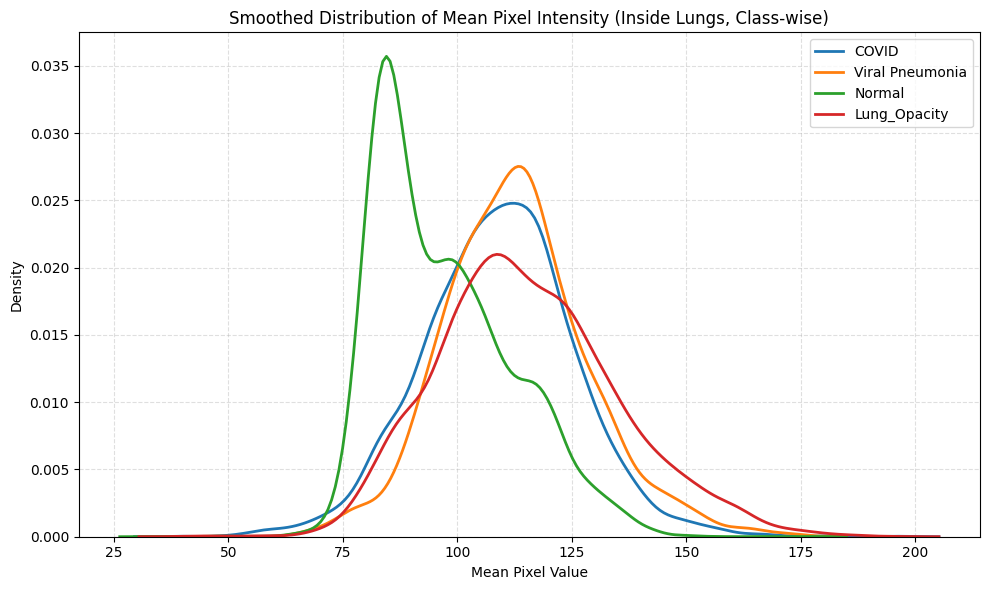

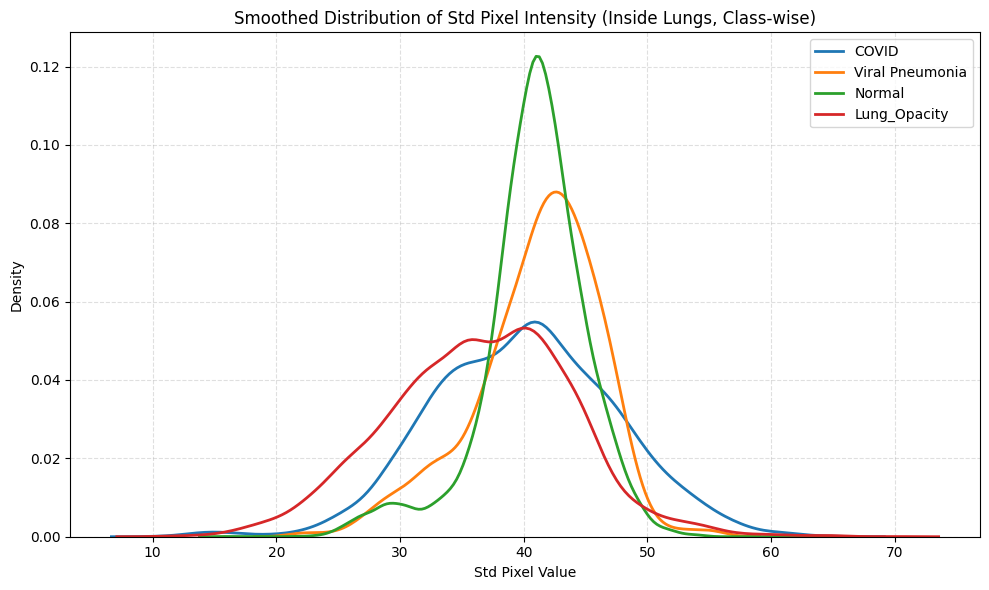

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for Mean Intensity (Class-wise)
plt.figure(figsize=(10, 6))

for cls in classes:
    class_data = df_stats[df_stats['label'] == cls]['mean_intensity']
    sns.kdeplot(class_data, label=cls, linewidth=2)

plt.title("Smoothed Distribution of Mean Pixel Intensity (Inside Lungs, Class-wise)")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot KDE for Std Intensity (Class-wise)
plt.figure(figsize=(10, 6))

for cls in classes:
    class_data = df_stats[df_stats['label'] == cls]['std_intensity']
    sns.kdeplot(class_data, label=cls, linewidth=2)

plt.title("Smoothed Distribution of Std Pixel Intensity (Inside Lungs, Class-wise)")
plt.xlabel("Std Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
